<a href="https://colab.research.google.com/github/saranshg20/3d-pose-warping/blob/master/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from matplotlib import image 
import glob
import os
from PIL import Image
from numpy import asarray
import PIL
import pathlib
import tensorflow_datasets as tfds
# import tensorflow.keras.datasets.cifar10 as cf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DeepFashion/In-shop Clothes Retrieval Benchmark/Img/img.zip'

Streaming output truncated to the last 5000 lines.
   creating: img/WOMEN/Tees_Tanks/id_00005020/
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_7_additional.jpg  
   creating: img/WOMEN/Tees_Tanks/id_00005033/
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_6_flat.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_000

In [ ]:
infile = open('/content/drive/MyDrive/poses_fashion3d.pkl','rb')
poses = pickle.load(infile)

In [ ]:

#Function For Converting image into numpy array

def img_to_tensor (path):
  # load the image
  image = Image.open(path)
  # convert image to numpy array
  data = asarray(image)
  # print(type(data))
  # # summarize shape
  # print(data.shape)

  # # create Pillow image
  # image2 = Image.fromarray(data)
  # print(type(image2))

  # # summarize image details
  # print(image2.mode)
  # print(image2.size)
  data.reshape(256,256,3)
  return data

In [ ]:
img_to_tensor('/content/img/MEN/Denim/id_00000080/01_1_front.jpg')

array([[[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       ...,

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]]

In [ ]:
infile = open('/content/drive/MyDrive/poses_fashion3d.pkl','rb')
poses = pickle.load(infile)

In [ ]:
poses['MEN']['Denim']

{'id_00000080': {'01': {'7_additional': array([[130.54446242,  58.21699733,  -6.57802566],
          [130.22342615,  26.75180943, -31.69984673],
          [154.14882777,  58.17514617,  -7.81037125],
          [161.14508118,  96.69705098,   4.52422514],
          [154.76979734, 126.89779178,  -5.03674217],
          [142.76649069, 130.87651851,  12.29766973],
          [139.5653809 , 183.27079076,  25.64923933],
          [131.32050409, 228.97601612,  44.61275261],
          [106.85544391,  58.45313919,  -6.35070391],
          [ 97.45378491,  96.08208447,  -0.5946015 ],
          [103.7747928 , 126.93829473, -15.28899154],
          [114.10298876, 130.45884423,  11.68056029],
          [106.52280597, 181.46244891,  21.49321639],
          [108.62281449, 229.20768052,  40.15246083],
          [134.79650602,  22.68824506, -29.33679609],
          [141.50079473,  26.59384934, -20.87472326],
          [126.24233651,  22.7590046 , -29.46527305],
          [120.7231707 ,  26.87970453, -19.00

In [ ]:
poses['MEN']['Denim']['id_00007216']['01']['7_additional']

array([[117.05048677,  58.36290872,  -8.30116088],
       [115.28513141,  26.42453593, -33.57566985],
       [140.70489896,  56.16509849,  -8.14444255],
       [149.85511041,  93.21649353,   5.82733027],
       [153.21887772, 126.09058526,   2.38601272],
       [135.61611603, 129.43389532,  13.00351953],
       [141.66817098, 180.28763624,  23.4570277 ],
       [142.68720198, 227.67064033,  40.79439146],
       [ 93.87134565,  61.04468239,  -9.5718381 ],
       [ 91.07750057, 100.51603656,  -1.91274977],
       [ 92.62494678, 135.32629428,  -3.73938465],
       [107.4585675 , 130.61485297,  11.60375511],
       [110.73945561, 181.38923422,  23.06661558],
       [118.16455921, 228.40900318,  39.68230586],
       [119.44693035,  21.99997162, -31.16482885],
       [125.99951039,  25.40478116, -22.10442212],
       [111.20238703,  22.23576578, -31.59278497],
       [105.29132607,  26.46511694, -21.98091224],
       [121.08997502, 129.82683356,  12.26958447]])

In [ ]:
data = {}
for n in poses:
  for i in poses[n]:
  #data_men[i] = {} 
    for j in poses[n][i]:
    #data_men[i][j]={}
      for k in poses[n][i][j]:
      #data_men[i][j][k]={}
        for l in poses[n][i][j][k]:
          #data_men[i][j][k][l]={}
          #for m in poses[n][i][j][k][l]:
          #/content/img/MEN/Denim/id_00000182/01_1_front.jpg
          path = '/content/img/'+n+'/'+i+'/'+j+'/'+k+'_'+l+'.jpg'
          x = img_to_tensor(path)
          data.update({path : x})

#x = img_to_tensor(path)
#data_men[i][j][k][l]=x

In [ ]:
data_pose={}
for n in poses:
  for i in poses[n]:
    for j in poses[n][i]:
      for k in poses[n][i][j]:
        for l in poses[n][i][j][k]:
          #for m in poses[n][i][j][k][l]:
          path = '/content/img/'+n+'/'+i+'/'+j+'/'+k+'_'+l+'.jpg'
          data_pose.update({path : poses[n][i][j][k][l]})

In [ ]:
print(data["/content/img/MEN/Denim/id_00000080/01_7_additional.jpg"])

[[[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 ...

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]]


In [ ]:
data['Denim']

KeyError: ignored

In [ ]:
tstImg2=np.round(np.array(Image.open("/content/img/MEN/Denim/id_00000080/01_1_front.jpg")).convert('RGB').resize((224,224)),dtype=np.float32))

tf.reshape(tstImg2, shape=[-1, 224, 224, 3])

SyntaxError: ignored

In [ ]:
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

  

In [ ]:
tensor2=tf.io.decode_image(
    '/content/img/MEN/Denim/id_00000080/01_1_front.jpg'
)

InvalidArgumentError: ignored

In [ ]:
img=Image.open('/content/img/MEN/Denim/id_00000080/01_1_front.jpg')
array = tf.keras.preprocessing.image.img_to_array(img)

In [ ]:
print(array)

[[[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]

 ...

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]]]


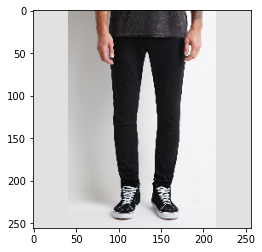

In [ ]:
data = image.imread('/content/img/MEN/Denim/id_00000080/01_1_front.jpg')
plt.imshow(data)

In [ ]:
len(data_pose)

42120

In [ ]:
joint_order=['neck', 'nose', 'lsho', 'lelb', 'lwri', 'lhip', 'lkne', 'lank', 'rsho', 'relb', 'rwri', 'rhip', 'rkne', 'rank', 'leye', 'lear', 'reye', 'rear', 'pelv']

In [ ]:
def give_name_to_keypoints(array, joint_order):
    #array = array.T
    res = {}
    for i, name in enumerate(joint_order):
        res[name] = array[i]
    return res

In [ ]:
for i, name in enumerate(joint_order):
  print(i,name)

0 neck
1 nose
2 lsho
3 lelb
4 lwri
5 lhip
6 lkne
7 lank
8 rsho
9 relb
10 rwri
11 rhip
12 rkne
13 rank
14 leye
15 lear
16 reye
17 rear
18 pelv


In [ ]:
path="/content/img/MEN/Denim/id_00000080/01_7_additional.jpg"
print(data_pose.get(path))
print(data.get(path))

[[130.54446242  58.21699733  -6.57802566]
 [130.22342615  26.75180943 -31.69984673]
 [154.14882777  58.17514617  -7.81037125]
 [161.14508118  96.69705098   4.52422514]
 [154.76979734 126.89779178  -5.03674217]
 [142.76649069 130.87651851  12.29766973]
 [139.5653809  183.27079076  25.64923933]
 [131.32050409 228.97601612  44.61275261]
 [106.85544391  58.45313919  -6.35070391]
 [ 97.45378491  96.08208447  -0.5946015 ]
 [103.7747928  126.93829473 -15.28899154]
 [114.10298876 130.45884423  11.68056029]
 [106.52280597 181.46244891  21.49321639]
 [108.62281449 229.20768052  40.15246083]
 [134.79650602  22.68824506 -29.33679609]
 [141.50079473  26.59384934 -20.87472326]
 [126.24233651  22.7590046  -29.46527305]
 [120.7231707   26.87970453 -19.00371111]
 [128.42298904 130.32023445  11.6306057 ]]
[[[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 232]]

 [[232 232 232]
  [232 232 232]
  [232 232 232]
  ...
  [232 232 232]
  [232 232 232]
  [232 232 

In [ ]:
data_with_joints={}
for path,image in data.items():
  array=data_pose.get(path)
  data_with_joints[path]=give_name_to_keypoints(data_pose.get(path), joint_order)


In [ ]:
data_with_joints["/content/img/MEN/Denim/id_00000080/01_7_additional.jpg"]['lsho']

array([154.14882777,  58.17514617,  -7.81037125])